In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
results_path = Path('../../../results/all/experiment_results.csv')
df = pd.read_csv(results_path)

# Filter for real datasets
real_datasets = ['bank_marketing', 'breast_cancer', 'adult_income', 'pima']
df_real = df[df['dataset_id'].isin(real_datasets)]

print(f"Loaded {len(df_real)} real experiments")
print(f"Methods: {df_real['model_name'].unique()}")
print(f"Datasets: {df_real['dataset_id'].unique()}")


Loaded 400 real experiments
Methods: ['lasso' 'lassonet' 'nimo' 'random_forest' 'neural_net']
Datasets: ['breast_cancer' 'pima' 'bank_marketing' 'adult_income']


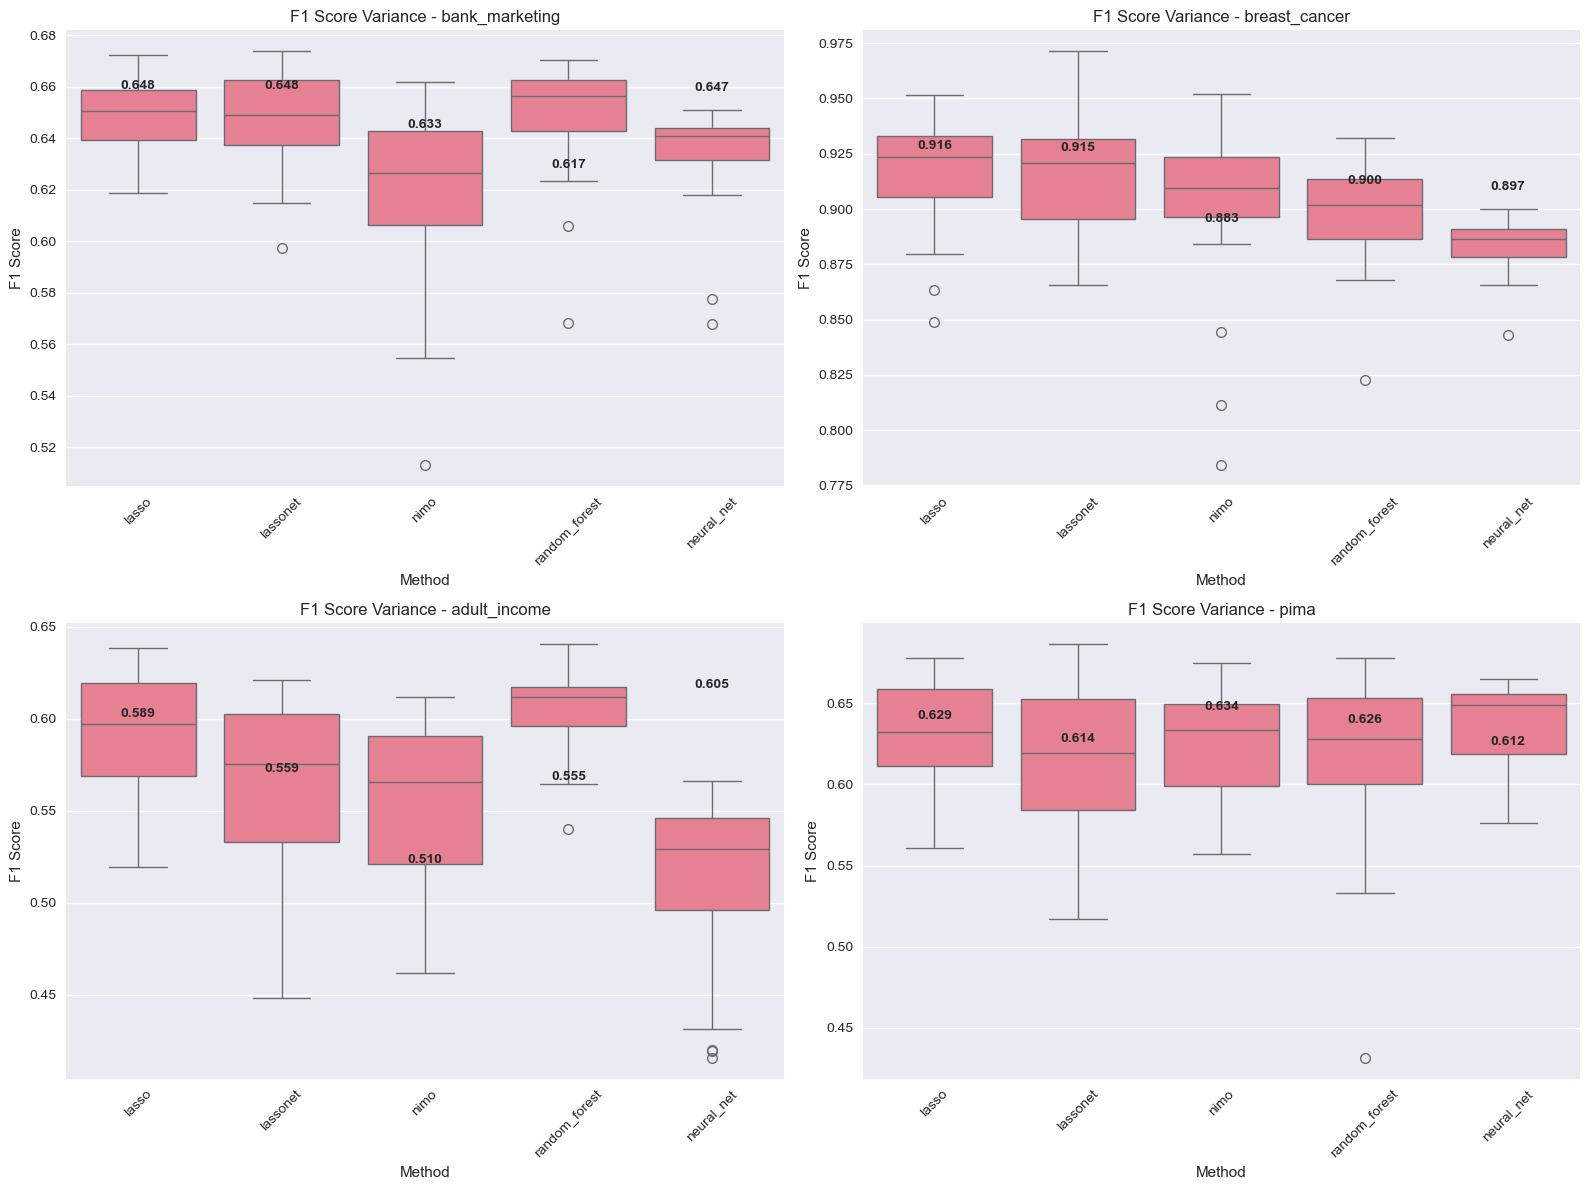

\n=== PERFORMANCE VARIANCE ANALYSIS ===
\nbank_marketing:
                 mean     std     min     max
model_name                                   
lasso          0.6480  0.0150  0.6188  0.6724
lassonet       0.6481  0.0202  0.5972  0.6738
neural_net     0.6327  0.0220  0.5679  0.6511
nimo           0.6174  0.0371  0.5130  0.6618
random_forest  0.6472  0.0251  0.5682  0.6703
\nbreast_cancer:
                 mean     std     min     max
model_name                                   
lasso          0.9158  0.0288  0.8487  0.9515
lassonet       0.9149  0.0277  0.8655  0.9714
neural_net     0.8828  0.0128  0.8430  0.9000
nimo           0.9001  0.0426  0.7841  0.9519
random_forest  0.8974  0.0248  0.8226  0.9320
\nadult_income:
                 mean     std     min     max
model_name                                   
lasso          0.5893  0.0358  0.5195  0.6382
lassonet       0.5593  0.0578  0.4480  0.6213
neural_net     0.5102  0.0510  0.4158  0.5660
nimo           0.5552  0.0429  0.46

In [9]:
# 1. Performance Variance over Iterations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, dataset in enumerate(real_datasets):
    dataset_data = df_real[df_real['dataset_id'] == dataset]
    
    # Create boxplot for F1 scores by method
    sns.boxplot(data=dataset_data, x='model_name', y='f1', ax=axes[i])
    axes[i].set_title(f'F1 Score Variance - {dataset}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('F1 Score')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add mean values as text
    means = dataset_data.groupby('model_name')['f1'].mean()
    for j, (method, mean) in enumerate(means.items()):
        axes[i].text(j, mean + 0.01, f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate variance statistics
print("\\n=== PERFORMANCE VARIANCE ANALYSIS ===")
for dataset in real_datasets:
    dataset_data = df_real[df_real['dataset_id'] == dataset]
    print(f"\\n{dataset}:")
    variance_stats = dataset_data.groupby('model_name')['f1'].agg(['mean', 'std', 'min', 'max']).round(4)
    print(variance_stats)


<Figure size 1500x1000 with 0 Axes>

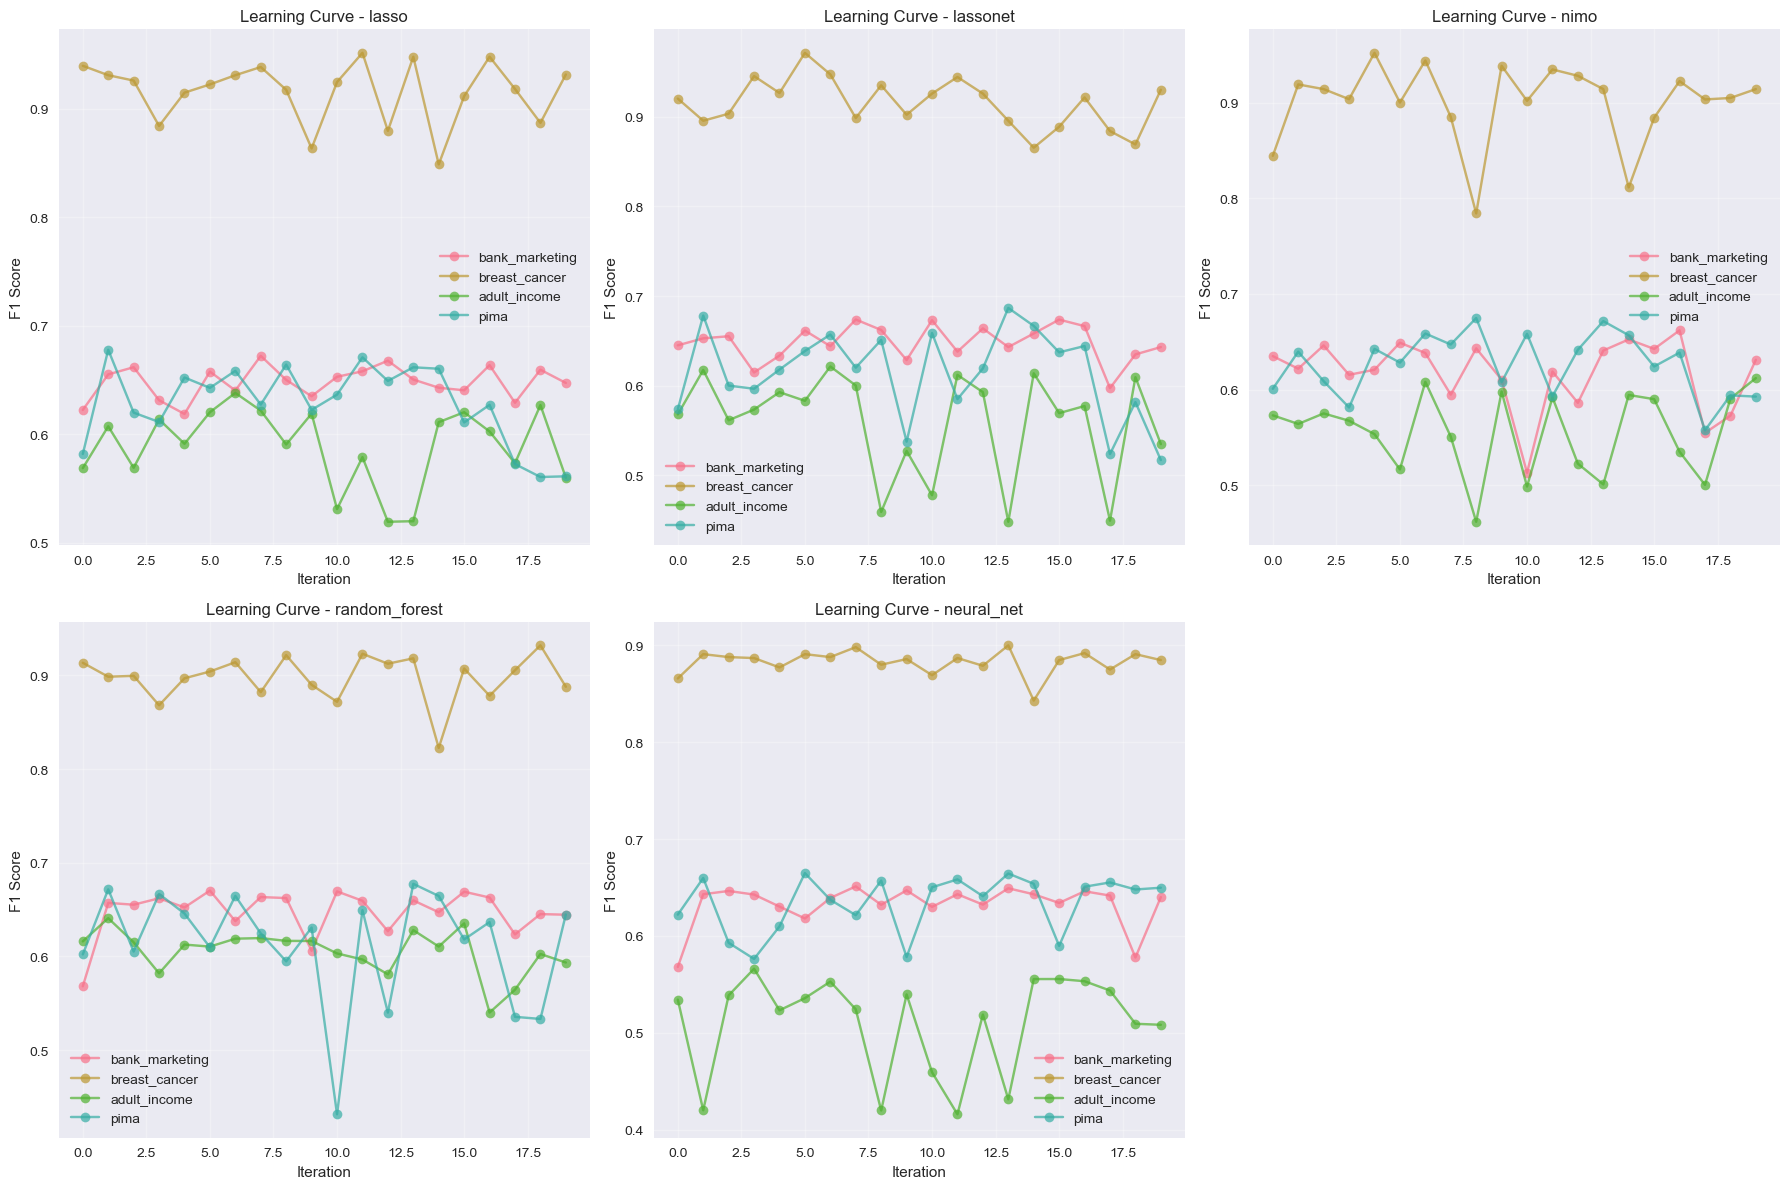

In [10]:
# 2. Learning Curves (Performance vs Iterations)
plt.figure(figsize=(15, 10))

# Create subplots for each method
methods = df_real['model_name'].unique()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, method in enumerate(methods):
    if i < len(axes):
        method_data = df_real[df_real['model_name'] == method]
        
        # Plot F1 score over iterations for each dataset
        for dataset in real_datasets:
            dataset_method_data = method_data[method_data['dataset_id'] == dataset]
            if len(dataset_method_data) > 0:
                # Sort by iteration to get proper learning curve
                dataset_method_data = dataset_method_data.sort_values('iteration')
                axes[i].plot(dataset_method_data['iteration'], dataset_method_data['f1'], 
                           marker='o', label=dataset, alpha=0.7)
        
        axes[i].set_title(f'Learning Curve - {method}')
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel('F1 Score')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(methods), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()
